In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '~/data/adl/'
annotation_path = ''.join([data_path, 'ADL_annotations/object_annotation/'])

In [3]:


def load_csv(path):
    df = pd.read_csv(path,
                         usecols=['frame_number', 'object_label', 'present'],
                         converters={'object_label':str, 'frame_number':int, 'present':int})
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    present = df[df['present']==1] # filter only present items
    occurence = present[['frame_number', 'object_label']] # use only frame number bad object label columns
    occurence['object_label'] = occurence['object_label'].map(lambda x: x.strip())
    return occurence

def get_cooccurrence(df):
    frames = pd.get_dummies(df.object_label).groupby(df.frame_number).apply(max) # get object occurance for each frame
    # calculate co-occurrance matrix
    frames_asint = frames.astype(int)
    coocc = frames_asint.T.dot(frames_asint)
    np.fill_diagonal(coocc.values, 0)
    # get self co-occurrence
    self_cooc = pd.get_dummies(df.object_label).groupby(df.frame_number).apply(sum)
    # self_cocc = pd.DataFrame(self_occ[self_occ >= 2].count())
    self_cooc = self_cooc[self_cooc >= 2].count()
    for i in coocc.index:
        coocc.loc[i, i] = self_cooc[i]
    return coocc

def draw_plot(coocc):
    nba = coocc
    # Normalize data columns
    nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

    # Sort data according to Points, lowest to highest
    # This was just a design choice made by Yau
    # inplace=False (default) ->thanks SO user d1337
    nba_sort = nba

    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(nba_sort, cmap=plt.cm.Reds, alpha=0.8)

    ##################################################
    ## FORMAT ##
    ##################################################

    fig = plt.gcf()
    fig.set_size_inches(20,20)

    # turn off the frame
    ax.set_frame_on(True)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(nba_sort.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(nba_sort.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Set the labels

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(nba_sort.columns, minor=False) 
    ax.set_yticklabels(nba_sort.index, minor=False)

    # rotate the 
    plt.xticks(rotation=90)

    ax.grid(True)

    # Turn off all the ticks
    ax = plt.gca()

    for t in ax.xaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False 
    for t in ax.yaxis.get_major_ticks(): 
        t.tick1On = False 
        t.tick2On = False

    # plt.imshow(coocc,interpolation='nearest', cmap='Reds')
    # plt.colorbar()
    plt.show()
    
def draw_simple(coocc):
    plt.imshow(coocc,interpolation='nearest', cmap='Reds')
    plt.colorbar()
    plt.show()

In [ ]:
dfs = [None] * 20
for i in range(1, 21):
    if i < 10:
        idx = '0' + str(i)
    else:
        idx = str(i)
    path = ''.join([annotation_path, 'object_annot_P_', idx, '.txt.csv'])
    dfs[i-1] = load_csv(path)
    dfs[i-1].loc[:, 'frame_number'] += i * 1000000
df = pd.concat(dfs)
df['object_label'] = df['object_label'].map(lambda x: x.strip()) # some fields have white space
coocc = get_cooccurrence(df)

draw_simple(coocc)
draw_plot(coocc)

/home/lifelogging/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df = pd.read_csv(''.join([data_path, 'present_objects.csv']), index_col=0)

In [5]:
self_cooc = pd.get_dummies(df.object_label).groupby(df.frame_number).apply(sum)
self_cooc = self_cooc[self_cooc >= 2].count()
self_cooc

basket                0
bed                   0
blanket               0
book                  2
bottle               27
cell                  1
cell_phone            1
cloth                 8
comb                  0
container            22
dent_floss            7
detergent             9
dish                 23
door                  0
electric_keys         0
food/snack           53
fridge                5
kettle               12
knife/spoon/fork     45
laptop              188
large_container       0
microwave             0
milk/juice            0
mop                   0
mug/cup              46
oven/stove            0
pan                   5
person                1
pills                 0
pitcher               0
shoe                  9
shoes                 0
soap_liquid           0
tap                   3
tea_bag               2
thermostat            0
tooth_brush          11
tooth_paste           8
towel                 8
trash_can             0
tv                    0
tv_remote       

In [10]:
coocc.to_csv(''.join([data_path, 'adl-coocc.csv']))

In [6]:
# Load it if already saved
cooc = pd.read_csv(''.join([data_path, 'adl-coocc.csv']), index_col=0)
cooc

,basket,bed,blanket,book,bottle,cell,cell_phone,cloth,comb,container,...,tea_bag,thermostat,tooth_brush,tooth_paste,towel,trash_can,tv,tv_remote,vacuum,washer/dryer
basket,0,0,0,0,31,0,0,50,0,0,...,0,0,0,0,11,0,0,0,0,7
bed,0,0,31,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0
blanket,0,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
book,0,0,0,2,0,0,35,0,0,0,...,0,0,0,0,0,0,0,6,0,0
bottle,31,0,0,0,27,0,0,2,0,1,...,0,0,0,0,2,0,3,0,0,0
cell,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell_phone,0,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,24,0,0
cloth,50,42,0,0,2,0,0,8,0,2,...,0,4,0,0,0,0,0,0,0,185
comb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
container,0,0,0,0,1,0,0,2,0,22,...,1,0,0,0,24,0,0,0,0,63


In [7]:
category_count = pd.DataFrame(df.object_label.value_counts())
category_count

,object_label
tap,3198
laptop,3106
mug/cup,2353
dish,2258
knife/spoon/fork,1780
tv_remote,1489
book,1242
food/snack,1173
container,990
washer/dryer,866


In [8]:
best_cooc = cooc[(cooc > 60).any(axis=1)]
best_rows = best_cooc.index.values
best_cooc = best_cooc[best_rows].dropna()
best_cooc

,book,cloth,container,detergent,dish,food/snack,kettle,knife/spoon/fork,laptop,mug/cup,oven/stove,pan,soap_liquid,tap,tea_bag,tooth_brush,tooth_paste,tv,tv_remote,washer/dryer
book,2,0,0,0,0,0,0,7,0,84,0,0,0,0,0,0,0,0,6,0
cloth,0,8,2,16,0,0,8,11,0,0,0,5,0,32,0,0,0,0,0,185
container,0,2,22,64,7,53,8,117,0,45,8,0,2,113,1,0,0,0,0,63
detergent,0,16,64,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139
dish,0,0,7,0,23,483,3,521,0,47,22,10,8,474,0,0,0,0,11,0
food/snack,0,0,53,0,483,53,0,241,0,22,123,103,0,5,0,0,0,0,0,0
kettle,0,8,8,0,3,0,12,1,0,81,170,0,0,20,3,0,0,0,0,0
knife/spoon/fork,7,11,117,0,521,241,1,45,0,582,111,125,9,204,9,0,0,0,163,0
laptop,0,0,0,0,0,0,0,0,188,16,0,0,0,0,0,0,0,119,6,0
mug/cup,84,0,45,0,47,22,81,582,16,46,24,13,8,279,97,101,1,42,235,0


In [12]:
probability = coocc.div(category_count['object_label'], axis='index')
probability

,basket,bed,blanket,book,bottle,cell,cell_phone,cloth,comb,container,...,tea_bag,thermostat,tooth_brush,tooth_paste,towel,trash_can,tv,tv_remote,vacuum,washer/dryer
basket,0.000000,0.000000,0.000000,0.000000,0.105442,0.000000,0.000000,0.170068,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037415,0.000000,0.000000,0.000000,0.000000,0.023810
bed,0.000000,0.000000,0.172222,0.000000,0.000000,0.000000,0.000000,0.233333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
blanket,0.000000,0.968750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
book,0.000000,0.000000,0.000000,0.001610,0.000000,0.000000,0.028180,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004831,0.000000,0.000000
bottle,0.064854,0.000000,0.000000,0.000000,0.056485,0.000000,0.000000,0.004184,0.000000,0.002092,...,0.000000,0.000000,0.000000,0.000000,0.004184,0.000000,0.006276,0.000000,0.000000,0.000000
cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cell_phone,0.000000,0.000000,0.000000,0.109718,0.000000,0.000000,0.003135,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075235,0.000000,0.000000
cloth,0.095420,0.080153,0.000000,0.000000,0.003817,0.000000,0.000000,0.015267,0.000000,0.003817,...,0.000000,0.007634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353053
comb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
container,0.000000,0.000000,0.000000,0.000000,0.001010,0.000000,0.000000,0.002020,0.000000,0.022222,...,0.001010,0.000000,0.000000,0.000000,0.024242,0.000000,0.000000,0.000000,0.000000,0.063636


In [13]:
probability.to_csv(''.join([data_path, 'adl-coocc-prob.csv']))

In [9]:
probability = pd.read_csv(''.join([data_path, 'adl-coocc-prob.csv']), index_col=0)

In [10]:
best_probability = best_cooc.div(category_count.ix[best_rows]['object_label'], axis='index')
best_probability.to_csv(''.join([data_path, 'adl-coocc-prob-top20.csv']))
best_probability

,book,cloth,container,detergent,dish,food/snack,kettle,knife/spoon/fork,laptop,mug/cup,oven/stove,pan,soap_liquid,tap,tea_bag,tooth_brush,tooth_paste,tv,tv_remote,washer/dryer
book,0.001610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005636,0.000000,0.067633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004831,0.000000
cloth,0.000000,0.015267,0.003817,0.030534,0.000000,0.000000,0.015267,0.020992,0.000000,0.000000,0.000000,0.009542,0.000000,0.061069,0.000000,0.000000,0.000000,0.000000,0.000000,0.353053
container,0.000000,0.002020,0.022222,0.064646,0.007071,0.053535,0.008081,0.118182,0.000000,0.045455,0.008081,0.000000,0.002020,0.114141,0.001010,0.000000,0.000000,0.000000,0.000000,0.063636
detergent,0.000000,0.056940,0.227758,0.032028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.494662
dish,0.000000,0.000000,0.003100,0.000000,0.010186,0.213906,0.001329,0.230735,0.000000,0.020815,0.009743,0.004429,0.003543,0.209920,0.000000,0.000000,0.000000,0.000000,0.004872,0.000000
food/snack,0.000000,0.000000,0.045183,0.000000,0.411765,0.045183,0.000000,0.205456,0.000000,0.018755,0.104859,0.087809,0.000000,0.004263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kettle,0.000000,0.019048,0.019048,0.000000,0.007143,0.000000,0.028571,0.002381,0.000000,0.192857,0.404762,0.000000,0.000000,0.047619,0.007143,0.000000,0.000000,0.000000,0.000000,0.000000
knife/spoon/fork,0.003933,0.006180,0.065730,0.000000,0.292697,0.135393,0.000562,0.025281,0.000000,0.326966,0.062360,0.070225,0.005056,0.114607,0.005056,0.000000,0.000000,0.000000,0.091573,0.000000
laptop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060528,0.005151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038313,0.001932,0.000000
mug/cup,0.035699,0.000000,0.019125,0.000000,0.019975,0.009350,0.034424,0.247344,0.006800,0.019550,0.010200,0.005525,0.003400,0.118572,0.041224,0.042924,0.000425,0.017850,0.099873,0.000000


In [12]:
best_pr2 = probability[(probability > 0.2).any(axis=1)]
best_rows_pr = best_pr2.index.values
best_pr2 = best_pr2[best_rows_pr].dropna()
best_pr2.columns

Index([u'bed', u'blanket', u'cloth', u'detergent', u'dish', u'food/snack',
       u'kettle', u'knife/spoon/fork', u'large_container', u'milk/juice',
       u'mug/cup', u'oven/stove', u'pan', u'pitcher', u'soap_liquid',
       u'tea_bag', u'tooth_brush', u'tooth_paste', u'tv', u'washer/dryer'],
      dtype='object')

In [ ]:
draw_simple(probability)
draw_plot(probability)


In [ ]:
draw_simple(best_probability)
draw_plot(best_probability)

In [15]:
len(probability.index)

44

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


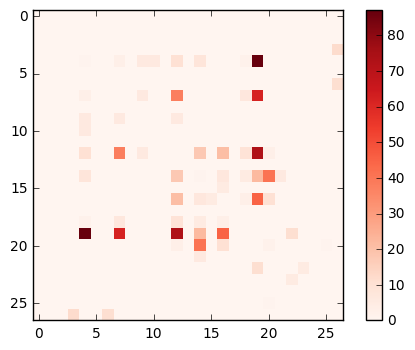

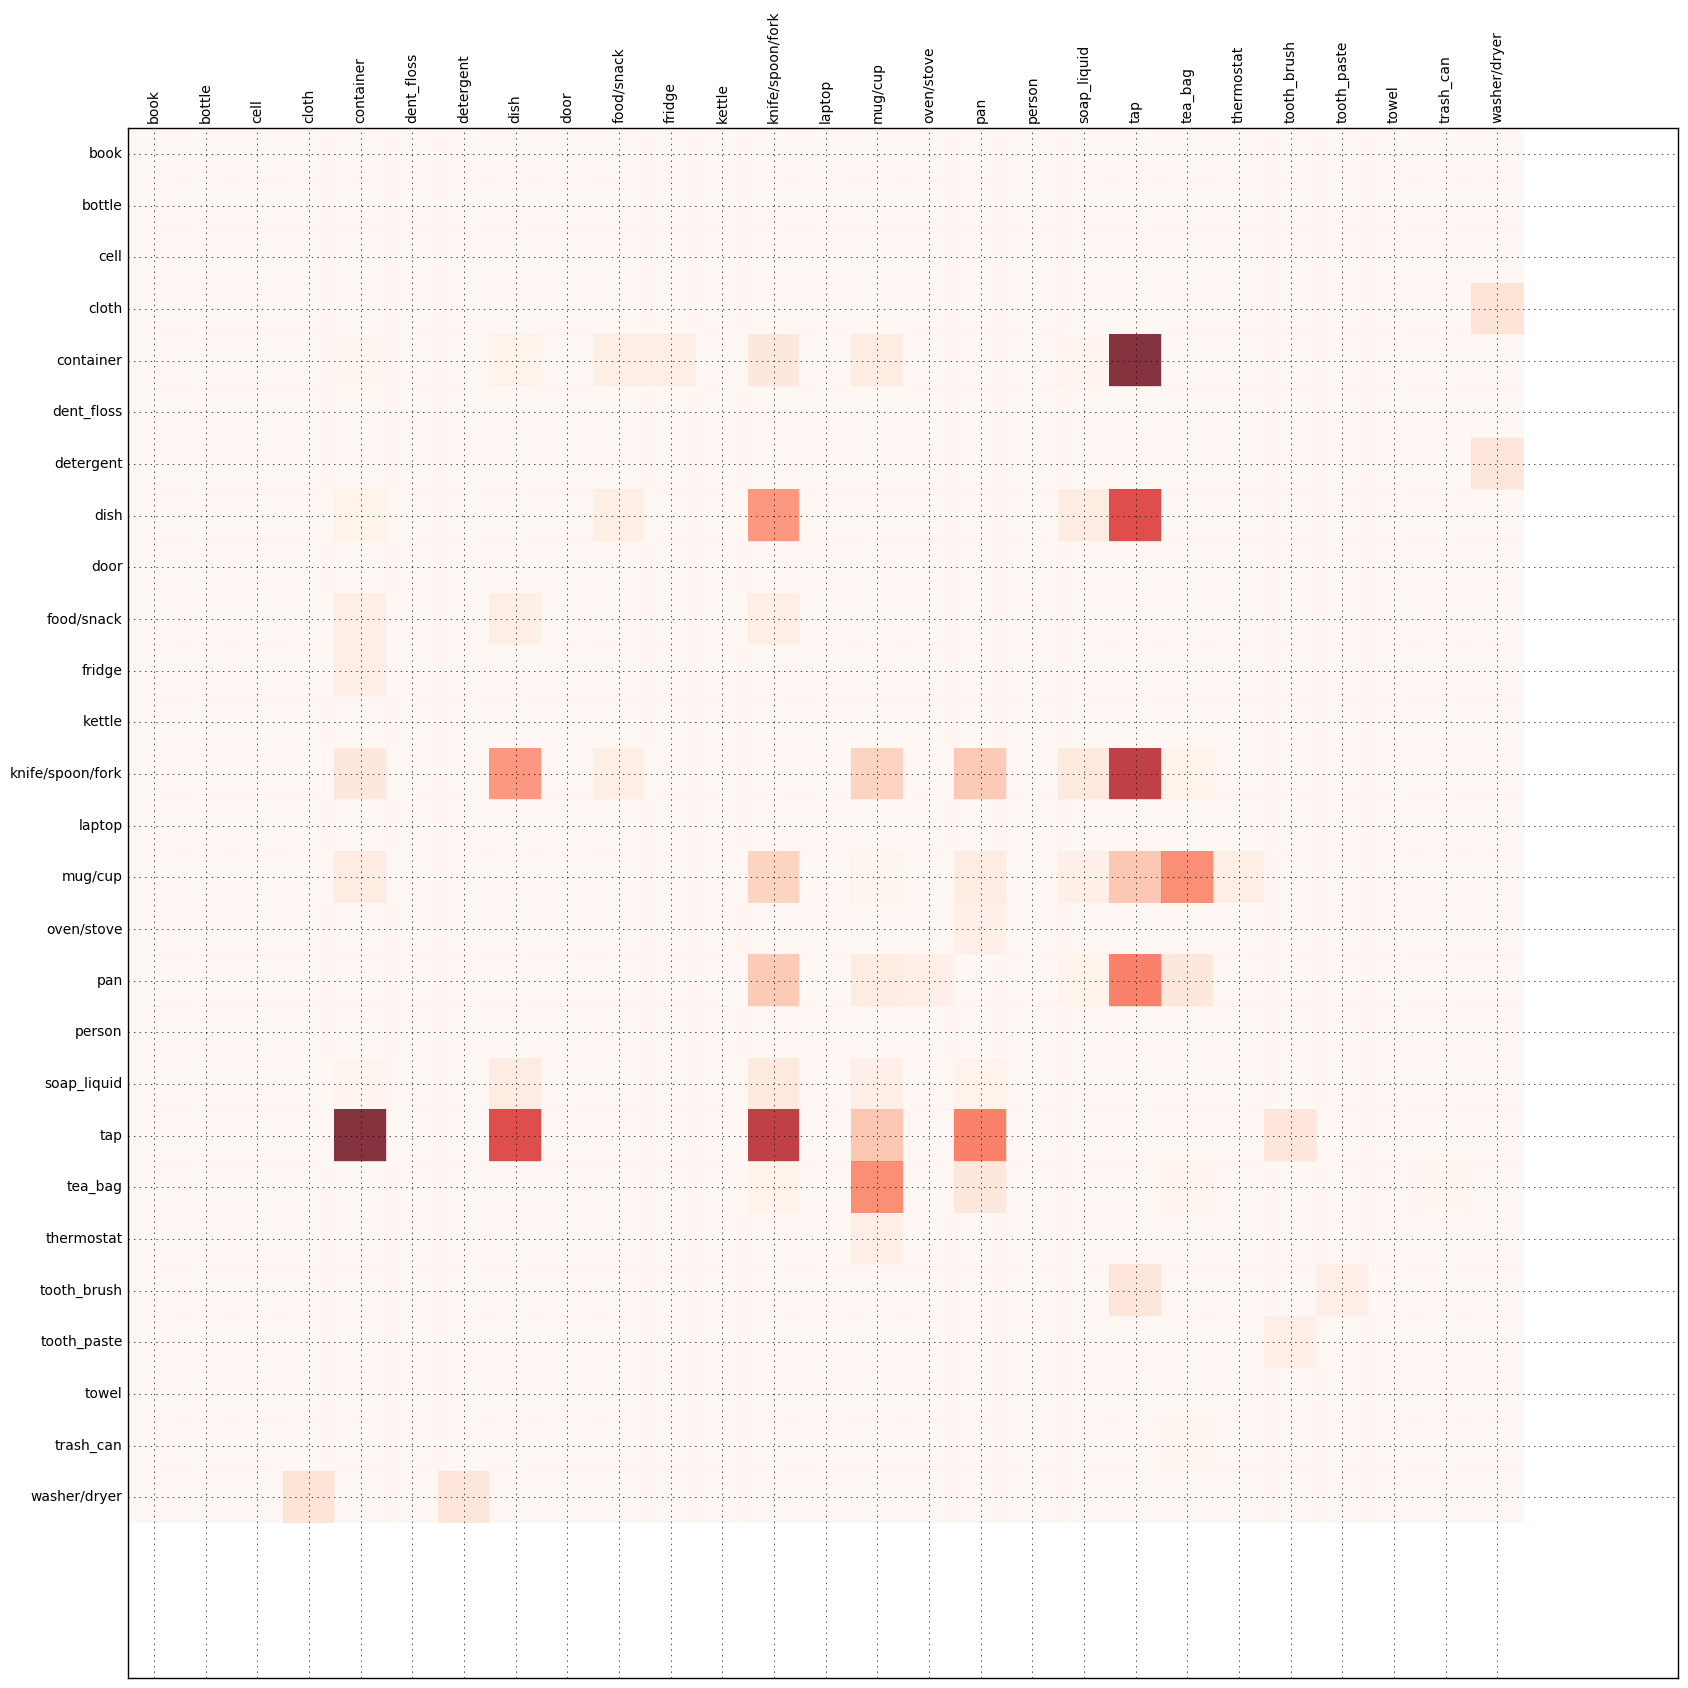

In [16]:
spath = ''.join([annotation_path, 'object_annot_P_03.txt.csv'])
sdf = load_csv(spath)
scoocc = get_cooccurrence(sdf)
draw_simple(scoocc)
draw_plot(scoocc)

In [20]:
s_category_count = pd.DataFrame(sdf.object_label.value_counts())
s_probability = scoocc.div(s_category_count['object_label'], axis='index')

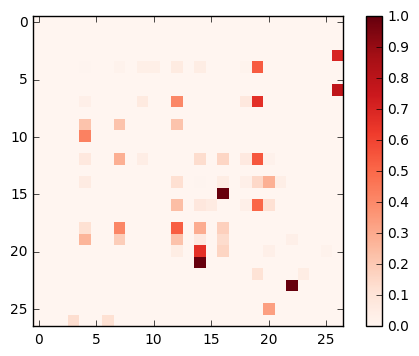

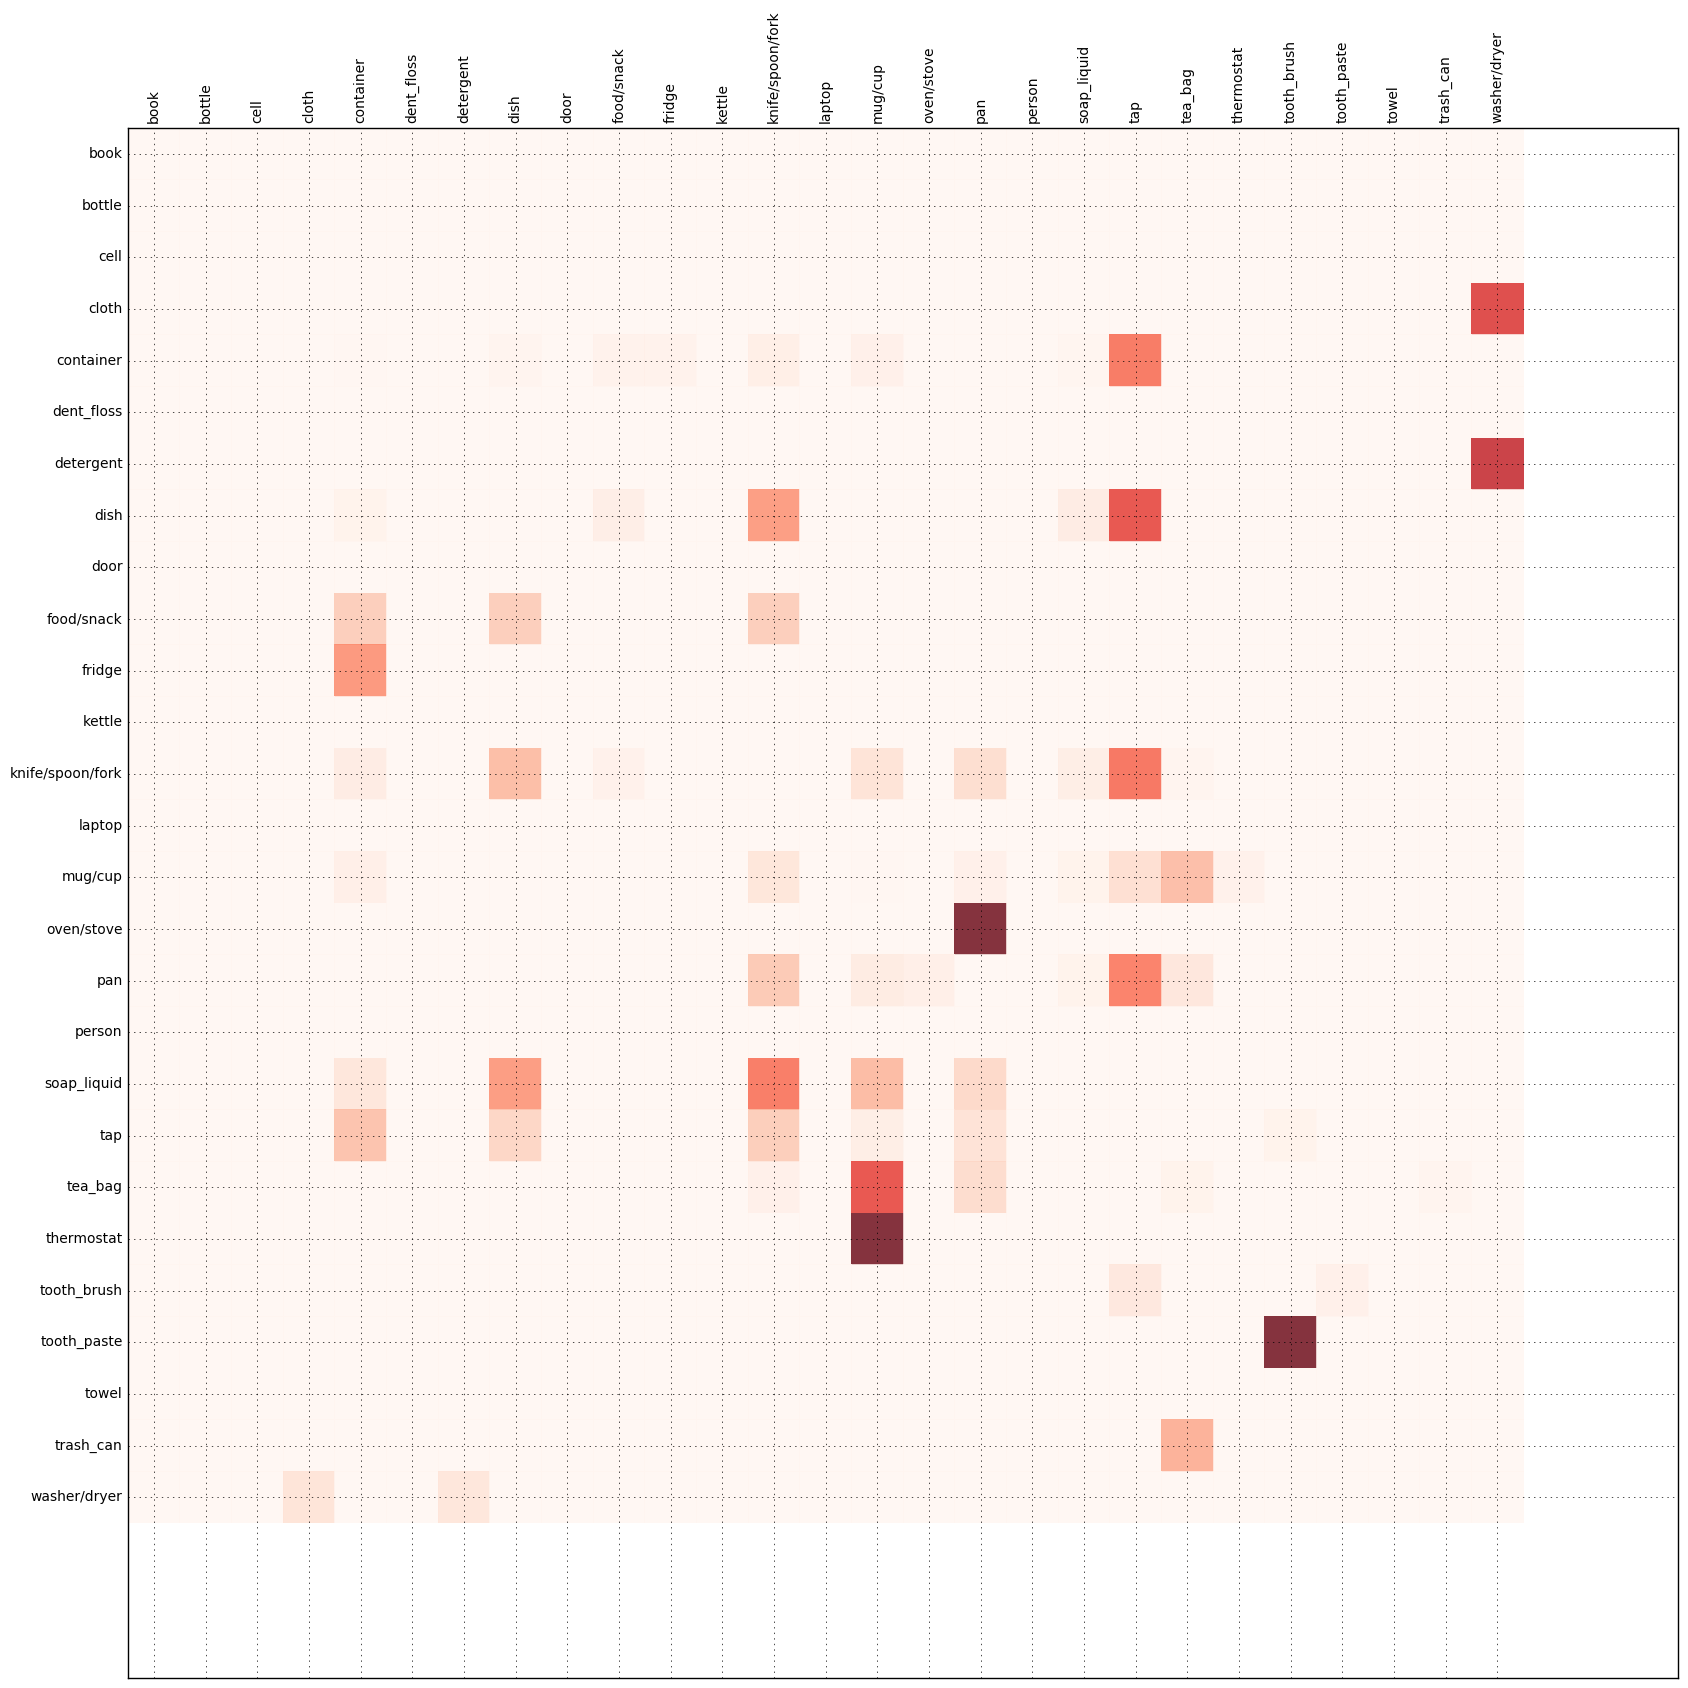

In [21]:
draw_simple(s_probability)
draw_plot(s_probability)